# Python Lab 04a: Support Vector Machine (SVM) Lineari
## Francesco Della Santa, Matematica per l'Intelligenza Artificiale, Politecnico di Torino

In questa esercitazione utilizzeremo alcune classi di scikit-learn per l'utilizzo di SVM lineari per la classificazione.

## Riassunto sulle SVM

Per informazioni più approfondite, consultare il capitolo 12 del libro *Mathematics for Machine Learning* (https://mml-book.github.io/) e/o il capitolo 9 del libro _An Introduction to Statistical Learning_ (https://www.statlearning.com/).

**Notazioni per l'esercitazione:**
1. $\mathcal{T} = \{(\boldsymbol{x}_1, y_1), \ldots , (\boldsymbol{x}_T, y_T) \}\subset \mathbb{R}^n\times \{\pm 1\}$ è il training set costiutito da $T$ coppie $(\boldsymbol{x}_i, y_i)$, con $y_i=\pm 1$ rappresentante la classe del vettore $\boldsymbol{x_i}\in\mathbb{R}^n$. 

2. Indichiamo rispettivamente l'insieme dei vettori e l'insieme delle classi in $\mathcal{T}$ con $$X_{\mathcal{T}}=\{\boldsymbol{x}_1,\ldots ,\boldsymbol{x}_T\}$$ e $$Y_{\mathcal{T}}=\{y_1,\ldots ,y_T\}\,.$$

3. Indichiamo con $\Pi_{\boldsymbol{w},b}$ l'iperpiano di $\mathbb{R}^n$ definito dal vettore normale $\boldsymbol{w}\in\mathbb{R}^n$ e dal parametro $b\in\mathbb{R}$, cioè $$\Pi_{\boldsymbol{w},b}:= \{\boldsymbol{x}\in\mathbb{R}^n \ | \ \boldsymbol{w}^T\boldsymbol{x} + b = 0\}\,.$$ *N.B.: rispetto alle slide, abbiamo un cambio di notazione. Questa notazione alternativa segue quella usata da scikit-learn e dal libro sopra indicato, nel caso di una consultazione di questi ultimi durante l'esercitazione.* 

4. Indichiamo con $\mathrm{dist}(\Pi_{\boldsymbol{w},b}, \boldsymbol{x})$ la distanza euclidea tra un vettore $\boldsymbol{x}\in\mathbb{R}^n$ e l'iperpiano $\Pi_{\boldsymbol{w},b}$. In particolare, ricordiamo che $$\mathrm{dist}(\Pi_{\boldsymbol{w},b}, \boldsymbol{x}) = \frac{|\boldsymbol{w}^T\boldsymbol{x} + b|}{||\boldsymbol{w}||}\,.$$

### Idea alla Base delle SVM

L'idea alla base delle SVM è quella di trovare l'iperpiano che divide i vettori $\boldsymbol{x}_1,\ldots ,\boldsymbol{x}_T$ nelle due classi di appartenenza $\pm 1$, massimizzando l'ampiezza $M_{\boldsymbol{w},b}$ del margine di separazione (vedi figura).

**N.B.:** la separazione "ottimale" avviene imponendo che l'iperpiano sia equidistante dai vettori ad esso più vicini, per ognuna delle due classi; questo significa che le "semi-ampiezze" del margine devono essere uguali tra loro e pari alla distanza dei più vicini vettori all'iperpiano (per ognuna delle classi)

<img src="svm_margin.png" width="480">


<!--- ![svm_margin](figures/svm_margin.png) --->

Matematicamente, l'ampiezza del margine $M_{\boldsymbol{w},b}$ di un iperpiano $\Pi_{\boldsymbol{w},b}$ che divide due sottoinsiemi di vettori è quindi: $$M_{\boldsymbol{w},b} = 2\cdot \min_{\boldsymbol{x}}\mathrm{dist}(\Pi_{\boldsymbol{w},b}, \boldsymbol{x})\,.$$


Concettualmente, assumendo le classi $+1$ e $-1$ linearmente separabili, vogliamo quindi risolvere il problema
\begin{equation}
\begin{cases}
\max_{\boldsymbol{w},b} M_{\boldsymbol{w},b}\\
y_i \frac{(\boldsymbol{w}^T\boldsymbol{x}_i + b)}{||\boldsymbol{w}||} \geq \frac{M_{\boldsymbol{w},b}}{2} \,,\quad \forall \ i=1,\ldots ,T
\end{cases}
\,,
\end{equation}
dove il vincolo $y_i \frac{(\boldsymbol{w}^T\boldsymbol{x}_i + b)}{||\boldsymbol{w}||} \geq \frac{M_{\boldsymbol{w},b}}{2}$ indica la richiesta di avere i punti classificati come $\pm 1$ rispettivamente dalla "parte $\gtrless 0$" dell'iperpiano e ad una distanza maggiore o uguale alla metà del margine.

### La Formulazione del Problema di Ottimizzazione nella Pratica

Poiché per ogni scalare $k\in\mathbb{R}\setminus\{0\}$ vale $\Pi_{k\boldsymbol{w},kb}\equiv \Pi_{\boldsymbol{w}, b}$, possiamo restringere la ricerca dell'iperpiano separatore ottimale a quei parametri $\boldsymbol{w}$ e $b$ tali che $$|\boldsymbol{w}^T\boldsymbol{x}+b|\geq 1\,, \ \forall \, \boldsymbol{x}\in X_{\mathcal{T}} \,.$$

**Definizioni:**
1. iperpiani di questo tipo si definiscono *iperpiani canonici rispetto* $X_{\mathcal{T}}$.

2. i vettori $\boldsymbol{x}\in X_{\mathcal{T}}$ tali che $|\boldsymbol{w}^T\boldsymbol{x}+b| = 1$ sono definiti *support vectors*.

**Osservazioni:**
1. se $\Pi_{\boldsymbol{w},b}$ è un iperpiano canonico rispetto $X_{\mathcal{T}}$, allora $M_{\boldsymbol{w},b}=\frac{2}{||\boldsymbol{w}||}$.

2. restringendo il problema agli iperpiani canonici rispetto $X_{\mathcal{T}}$, massimizzare $M_{\boldsymbol{w},b} = 2 / ||\boldsymbol{w}||$ è equivalente a minimizzare $\frac{1}{2}||\boldsymbol{w}||^{2} = \frac{1}{2}\boldsymbol{w}^T\boldsymbol{w}$.

Il problema di ottimizzazione per trovare il separatore ottimale può essere quindi riscritto come:
\begin{equation}
\begin{cases}
\min_{\boldsymbol{w}} \frac{1}{2}\boldsymbol{w}^T\boldsymbol{w}\\
y_i (\boldsymbol{w}^T\boldsymbol{x}_i + b) \geq 1 \,,\quad \forall \ i=1,\ldots ,T
\end{cases}
\end{equation}

### Il Problema Duale

Il problema di minimizzazione delle SVM sopra descritto viene risolto passando per il suo problema duale:
\begin{equation}
\begin{cases}
\min_{\boldsymbol{\alpha}} \frac{1}{2}\boldsymbol{\alpha}^T Q \boldsymbol{\alpha} - \sum_{i=1}^T \alpha_i\\
\sum_{i=1}^T \alpha_i y_i = 0\\
\alpha_i \geq 0\,,\quad \forall \ i=1,\ldots ,T
\end{cases}\,,
\end{equation}
dove $\boldsymbol{\alpha}\in\mathbb{R}^T$ e la matrice $Q\in\mathbb{R}^{T\times T}$ è tale che
\begin{equation}
Q = \left(q_{i,j}\right)_{i,j=1,\ldots ,T} =  \left( y_iy_j\boldsymbol{x}_i^T\boldsymbol{x}_j \right)_{i,j=1,\ldots ,T}\,.
\end{equation}

**Osservazione:** Il problema duale considerato è un tipo di problema di ottimizzazione definito "*programmazione quadratica*", cioè con funzione obiettivo *quadratica* e vincoli *lineari*.

**N.B.:** non è scopo di questo corso affrontare i dettagli dei problemi di ottimizzazione in questione né i metodi numerici per la loro risoluzione.

### Calcolo dell'Iperpiano Separatore data la Soluzione del Duale


Data la soluzione $\boldsymbol{\alpha}^*$ del problema duale, questa determina la soluzione $(\boldsymbol{w}^*,b^*)$ del problema primale. In particolare, è importante fare le seguenti osservazioni.

**Osservazioni:** 
1. sia $\boldsymbol{x}_i\in X_{\mathcal{T}}$ *NON* un support vector per l'iperpiano separatore ottimale, cioè per $\Pi_{\boldsymbol{w}^*,b^*}$; allora l'elemento $i$-esimo di $\boldsymbol{\alpha}^*$ è nullo, cioè $\alpha_i^*=0$.

2. sia l'elemento $i$-esimo di $\boldsymbol{\alpha}^*$ non nullo, cioè $\alpha_i^* \neq0$; allora $\boldsymbol{x}_i\in X_{\mathcal{T}}$ è un support vector per l'iperpiano separatore ottimale, cioè per $\Pi_{\boldsymbol{w}^*,b^*}$.

**Definizione/Notazione:** indichiamo con $\mathcal{I}_{\mathrm{sv}}$ l'insieme di indici corrispondenti agli elementi non nulli di $\boldsymbol{\alpha}^*$, cioè $$\mathcal{I}_{\mathrm{sv}} = \{i \ | \ \alpha_i^*\neq 0\}\,;$$
per l'osservazione (2) precedente abbiamo quindi che $\boldsymbol{x}_i\in X_{\mathcal{T}}$ è un *support vector* di $\Pi_{\boldsymbol{w}^*,b^*}$ se $i\in\mathcal{I}_{\mathrm{sv}}$.

**Calcolo di** $\Pi_{\boldsymbol{w}^*,b^*}$**:**
- $\boldsymbol{w}^* = \sum_{i=1}^T y_i\alpha_i^* \boldsymbol{x}_i = \sum_{i\in\mathcal{I}_{\mathrm{sv}}} y_i\alpha_i^* \boldsymbol{x}_i$.

- $b^* = \frac{1}{|\mathcal{I}_{\mathrm{sv}}|} \sum_{i\in\mathcal{I}_{\mathrm{sv}}} (y_i - \boldsymbol{w}^{*\,T} \boldsymbol{x}_i)$

### Bordi del Margine dell'Iperpiano Separatore Ottimale

i bordi del margine $M_{\boldsymbol{w}^*,b^*}$ sono identificati dai due iperpiani
\begin{equation}
\mathcal{M}^+_{\boldsymbol{w}^*,b^*} = \{\boldsymbol{x}\in\mathbb{R}^n \ | \ \boldsymbol{w}^{*\,T}\boldsymbol{x} + b^* - 1 = 0\}
\end{equation}
e
\begin{equation}
\mathcal{M}^-_{\boldsymbol{w}^*,b^*} = \{\boldsymbol{x}\in\mathbb{R}^n \ | \ \boldsymbol{w}^{*\,T}\boldsymbol{x} + b^* + 1 = 0\}\,;
\end{equation}
cioè sono identificati rispettivamente da quegli $\boldsymbol{x}\in\mathbb{R}^n$ tali che $\boldsymbol{w}^{*\,T}\boldsymbol{x} + b^* =\pm 1$.

## SVM con Margine "Morbido" ("Soft")

Non sempre due classi sono perfettamente linearmente separabili. A causa di rumore sui dati, può infatti capitare che classi teoricamente linearmente separabili non lo siano nella pratica (escludiamo il caso di separazioni altamente non lineari).

Diventa quindi necessario introdurre una certa tolleranza sulla possibilità di *oltrepassare il margine* per i vettori $\boldsymbol{x}_i$.

**Notazione/Definizione:** $\delta_i$ indica la distanza di $\boldsymbol{x}_i$ dal bordo di margine corrispondente alla sua classe, se $\boldsymbol{x}_i$ ha superato questo bordo, altrimenti $\delta_i = 0$ (vedi figura).

<img src="svm_soft_distances.png" width="480">


### Riformulazione del Problema di Minimizzazione

Questo "rilassamento" delle condizioni per il margine, si traduce nell'introduzione di variabili di slack $\xi_i$ nel problema primale, le quali rappresentano le "distanze" $\delta_i$ moltiplicate per $||\boldsymbol{w}||$, cioè: $\xi_i = \delta_i||\boldsymbol{w}||$, per ogni $i=1,\ldots ,T$.

Il problema Primale diventa quindi
\begin{equation}
\begin{cases}
\min_{\boldsymbol{w}} \frac{1}{2}\boldsymbol{w}^T\boldsymbol{w} + C \sum_{i=1}^T \xi_i\\
y_i (\boldsymbol{w}^T\boldsymbol{x}_i + b) \geq 1 - \xi_i \,,\quad & \forall \ i=1,\ldots ,T\\
\xi_i\geq 0\,,\quad & \forall \ i=1,\ldots ,T\\
\end{cases}\,,
\end{equation}

oppure (equivalentemente)

\begin{equation}
\begin{cases}
\min_{\boldsymbol{w}} \frac{1}{2} \left( \boldsymbol{w}^T\boldsymbol{w} + C \sum_{i=1}^T \xi_i^2 \right)\\
y_i (\boldsymbol{w}^T\boldsymbol{x}_i + b) \geq 1 - \xi_i \,,\quad & \forall \ i=1,\ldots ,T\\
\xi_i\geq 0\,,\quad & \forall \ i=1,\ldots ,T\\
\end{cases}\,;
\end{equation}

Il parametro $C\in\mathbb{R}^+$ è un *parametro di regolarizzazione* che caratterizza il rilassamento delle condizioni per il margine:
- $C\rightarrow 0$ aumenta la "*morbidezza*" del margine, permettendo ai vettori $\boldsymbol{x}_i$ di superarlo illimitatamente;
- $C\rightarrow +\infty$ aumenta la "*durezza*" del margine, permettendo ai vettori $\boldsymbol{x}_i$ di superarlo impercettibilmente;

# Esercitazione: Implementazione di SVM Lineari

Nell'esercitazione di oggi utilizzeremo la classe *LinearSVC* di scikit-learn, pensata per l'implementazione di SVM lineari con *margine morbido*.

**N.B.:** in scikit-learn non è prevista una classe per SVM lineari senza margine morbido. Per simulare l'assenza di margine morbido è sempre possibile scegliere valori di $C$ molto alti.

**FILE DA SCARICARE:** per le seguenti celle di codice è necessario avere scaricato dalla pagina del corso il modulo *linear_r2.py*.

In [2]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
%matplotlib widget
#
#
import numpy as np
import pandas as pd
import sklearn
from sklearn.svm import LinearSVC
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
from linear_r2 import generate_square, HyperplaneR2

## Generazione Training Set

Generiamo un training set artificiale per esercitarci con le SVM. La generazione si basa sulle funzioni definite nel modulo *linear_r2.py*.
Generiamo un numero arbitrario e casuale di punti $\boldsymbol{x}_i\in[0,1]^2\subset\mathbb{R}^2$, separati nelle classi $\pm 1$ dalla retta $r: x_2 = 0.35 \cdot x_1 + 0.30$, equivalente all'iperpiano 
$$
[0.35, -1]
\begin{bmatrix}x_1\\ x_2\end{bmatrix} 
+ 0.30 = 0\,.
$$

**Esercizio:** guarda il contenuto del modulo *linear_r2.py* per capire il codice della cella seguente e completa le parti mancanti per eseguire il plot.

**RICORDA:** dati $\boldsymbol{w}^*$ e $b^*$ parametri dell'iperpiano separatore ottimale $\Pi_{\boldsymbol{w}^*,b^*}$, i bordi del margine sono identificati dai due iperpiani
\begin{equation}
\mathcal{M}^+_{\boldsymbol{w}^*,b^*} = \{\boldsymbol{x}\in\mathbb{R}^n \ | \ \boldsymbol{w}^{*\,T}\boldsymbol{x} + b^* - 1 = 0\}
\end{equation}
e
\begin{equation}
\mathcal{M}^-_{\boldsymbol{w}^*,b^*} = \{\boldsymbol{x}\in\mathbb{R}^n \ | \ \boldsymbol{w}^{*\,T}\boldsymbol{x} + b^* + 1 = 0\}\,;
\end{equation}
cioè sono identificati rispettivamente da quegli $\boldsymbol{x}\in\mathbb{R}^n$ tali che $\boldsymbol{w}^{*\,T}\boldsymbol{x} + b^* =\pm 1$.

Text(0.5, 1.0, 'SEP. LINEARE + RUMORE')

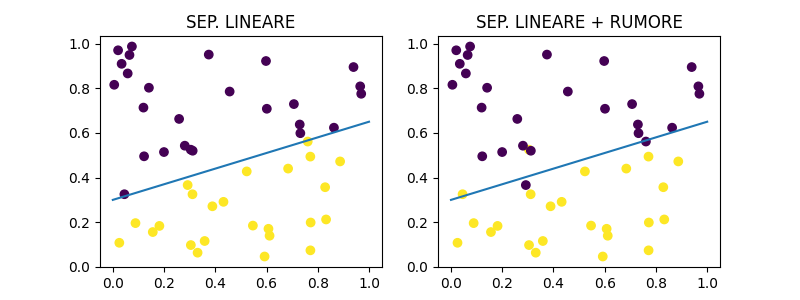

In [3]:
random_state = 42
n_samples = 50

w_true = np.array([0.35, -1.])
b_true = 0.30

line_true = HyperplaneR2(w_true, b_true)

# Consideriamo la retta 

X = generate_square(n_samples=n_samples, random_state=random_state)

_, y = line_true.demiplane_evaluate(X)

_, y_noise = line_true.demiplane_evaluate_noise(X)

# Plot a confronto
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].scatter(X[:, 0], X[:, 1], c=y)
axs[0].plot([0., 1.], [line_true.line_x2(0.), line_true.line_x2(1.)])
axs[0].set_title('SEP. LINEARE')
axs[1].scatter(X[:, 0], X[:, 1], c=y_noise)
axs[1].plot([0., 1.], [line_true.line_x2(0.), line_true.line_x2(1.)])
axs[1].set_title('SEP. LINEARE + RUMORE')

### Utilizzo della Classe LinearSVC

**Esercizio:** Leggere la documentazione della classe *LinearSVC* (https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) e completare i codici delle celle seguenti.

**Suggerimenti/Indicazioni l'esercizio:**
1. per lo svolgimento dell'esercizio focalizzarsi sui parametri di inizializzazione *C, loss, dual, random_state*;
2. il parametro di inizializzazione *loss* indica se la funzione obiettivo da minimizzare è $\frac{1}{2}\boldsymbol{w}^T\boldsymbol{w} + C\sum_{i=1}^T\xi_i$ (*hinge*) oppure $\frac{1}{2}\left(\boldsymbol{w}^T\boldsymbol{w} + C\sum_{i=1}^T\xi_i^2\right)$ (*squared_hinge*);
3. leggere bene i metodi della classe e gli attributi *coef_* ed *intercept_*;
4. *solo per informazione:* il parametro *penalty='l1'* indica di usare $||\boldsymbol{w}||_1= |w_1|+\cdots +|w_n|$ invece del "normale" $||\boldsymbol{w}||^2 = w_1^2 + \cdots + w_2^2$ nella funzione obiettivo (caso *penalty='l2'*).

**ATTENZIONE:** nella documentazione sembra indicato che la *hinge* loss non sia compatibile con il parametro *penalty='l1'*.

Text(0.5, 1.0, 'SVM SEP. LINEARE\n (w=[[-0.36431898  1.        ]]; b=[-0.29648097])')

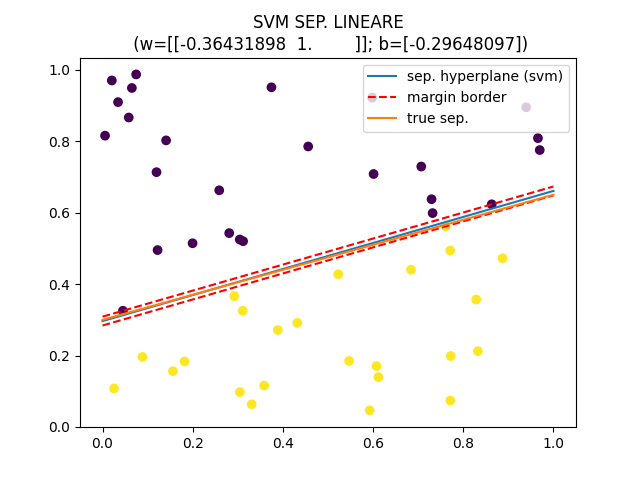

In [4]:
C_hard = 1e10
loss = 'squared_hinge'
dual = False

# Inizializzazione SVM
lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_state)

# Addestramento SVM
lsvm_hard.fit(X, y)

# Pesi retta (iperpiano di R^2) separatrice
w_hard = lsvm_hard.coef_
b_hard = lsvm_hard.intercept_

# Inizializzazione retta separatrice
line_hard = HyperplaneR2(w_hard, b_hard)

# Plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([0., 1.], [line_hard.line_x2(0.), line_hard.line_x2(1.)], label='sep. hyperplane (svm)')
plt.plot([0., 1.], [line_hard.margin_x2(0.)[0], line_hard.margin_x2(1.)[0]], 'r--', label='margin border')
plt.plot([0., 1.], [line_hard.margin_x2(0.)[1], line_hard.margin_x2(1.)[1]], 'r--')
plt.plot([0., 1.], [line_true.line_x2(0.), line_true.line_x2(1.)], label='true sep.')
plt.legend()
plt.title(f'SVM SEP. LINEARE\n (w={w_hard/w_hard[0, 1]}; b={b_hard/w_hard[0, 1]})')

Text(0.5, 1.0, 'SEP. LINEARE - C=2.5\n (w=[[-0.17978833  1.        ]]; b=[-0.38007062])')

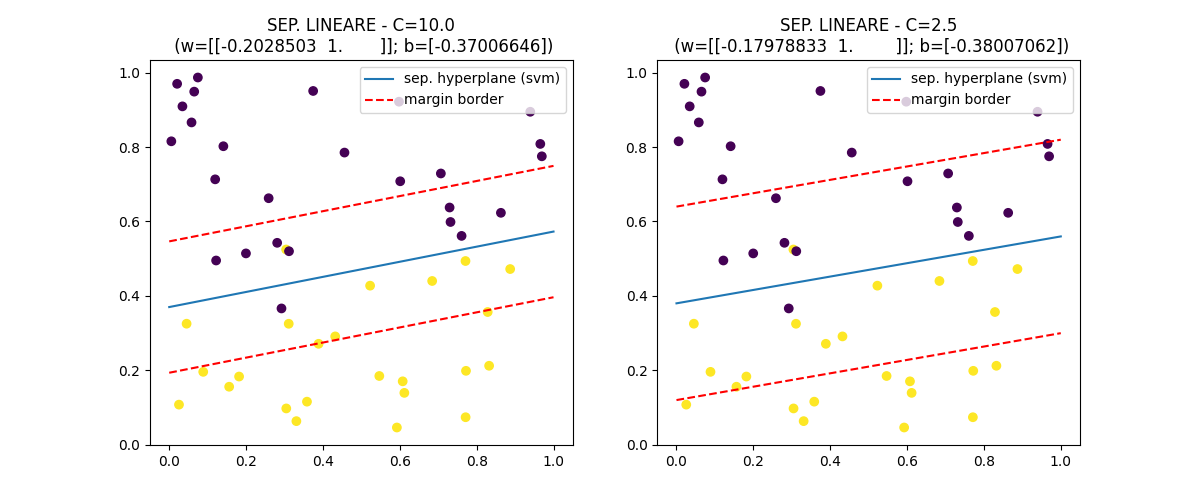

In [5]:
C_soft1 = 10.
C_soft2 = 2.5

# Inizializzazione SVM
lsvm_soft1 = LinearSVC(C=C_soft1, loss=loss, dual=dual, random_state=random_state)
lsvm_soft2 = LinearSVC(C=C_soft2, loss=loss, dual=dual, random_state=random_state)

# Addestramento SVM
lsvm_soft1.fit(X, y_noise)
lsvm_soft2.fit(X, y_noise)

# Inizializzazione retta separatrice
line_soft1 = HyperplaneR2(lsvm_soft1.coef_, lsvm_soft1.intercept_)
line_soft2 = HyperplaneR2(lsvm_soft2.coef_, lsvm_soft2.intercept_)

# Plot a confronto
fig_soft, axs_soft = plt.subplots(1, 2, figsize=(12, 5))
axs_soft[0].scatter(X[:, 0], X[:, 1], c=y_noise)
axs_soft[0].plot([0., 1.], [line_soft1.line_x2(0.), line_soft1.line_x2(1.)], label='sep. hyperplane (svm)')
axs_soft[0].plot([0., 1.], [line_soft1.margin_x2(0.)[0], line_soft1.margin_x2(1.)[0]], 'r--', label='margin border')
axs_soft[0].plot([0., 1.], [line_soft1.margin_x2(0.)[1], line_soft1.margin_x2(1.)[1]], 'r--')
axs_soft[0].legend()
axs_soft[0].set_title(f'SEP. LINEARE - C={C_soft1}\n (w={lsvm_soft1.coef_/lsvm_soft1.coef_[0, 1]}; b={lsvm_soft1.intercept_/lsvm_soft1.coef_[0, 1]})')
axs_soft[1].scatter(X[:, 0], X[:, 1], c=y_noise)
axs_soft[1].plot([0., 1.], [line_soft2.line_x2(0.), line_soft2.line_x2(1.)], label='sep. hyperplane (svm)')
axs_soft[1].plot([0., 1.], [line_soft2.margin_x2(0.)[0], line_soft2.margin_x2(1.)[0]], 'r--', label='margin border')
axs_soft[1].plot([0., 1.], [line_soft2.margin_x2(0.)[1], line_soft2.margin_x2(1.)[1]], 'r--')
axs_soft[1].legend()
axs_soft[1].set_title(f'SEP. LINEARE - C={C_soft2}\n (w={lsvm_soft2.coef_/lsvm_soft2.coef_[0, 1]}; b={lsvm_soft2.intercept_/lsvm_soft2.coef_[0, 1]})')